# Analyse des crimes commis à Los Angeles, de 2020 à nos jours

<style>
    .blue {
        color: #2a9d8f;
    }
</style>

<div class="blue">
    Objectif :
</div>Analyser la dataset pour découvrir des insights et aider les décideurs à prendre des décisions éclairées par les données.

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

## Chargement de la dataset

In [2]:
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

Vérifier le nombre de lignes et de colonnes dans la dataset

In [3]:
data.shape

(1004991, 28)

La dataset contient 1 millions de lignes et 28 colonnes

In [4]:
listedescrimes = data['Crm Cd Desc'].value_counts()
listedescrimes

Crm Cd Desc
VEHICLE - STOLEN                                           115190
BATTERY - SIMPLE ASSAULT                                    74839
BURGLARY FROM VEHICLE                                       63517
THEFT OF IDENTITY                                           62537
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     61092
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64

In [5]:
data.tail(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1004986,252104112,02/02/2025 12:00:00 AM,02/02/2025 12:00:00 AM,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233
1004990,251904210,03/25/2025 12:00:00 AM,03/25/2025 12:00:00 AM,1235,19,Mission,1944,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,11100 OMELVENY AV,NaN,34.2722,-118.4417


## Exploration et nettoyage de la dataset

### Vérifions les données dupliquées

In [6]:
data[data.duplicated()]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


### Vérifions les données manquantes

In [7]:
data.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151619
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
LOCATION                0
Cross Street       850755
LAT                     0
LON                     0
dtype: int64

Pourcentages des données manquantes par colonnes

In [8]:
mis_value = data.isna().sum()
mis_value_percentage = 100 * mis_value/(len(data))
mis_value_table = pd.concat([mis_value, mis_value_percentage], axis=1)
mis_value_table

,0,1
DR_NO,0,0.000000
Date Rptd,0,0.000000
DATE OCC,0,0.000000
TIME OCC,0,0.000000
AREA,0,0.000000
AREA NAME,0,0.000000
Rpt Dist No,0,0.000000
Part 1-2,0,0.000000
Crm Cd,0,0.000000
Crm Cd Desc,0,0.000000


In [9]:
mis_value_table = mis_value_table.rename(columns={0: "Missing values", 1: "% of missing values"})
mis_value_table

,Missing values,% of missing values
DR_NO,0,0.000000
Date Rptd,0,0.000000
DATE OCC,0,0.000000
TIME OCC,0,0.000000
AREA,0,0.000000
AREA NAME,0,0.000000
Rpt Dist No,0,0.000000
Part 1-2,0,0.000000
Crm Cd,0,0.000000
Crm Cd Desc,0,0.000000


Je vais trier les colonnes avec des données manquantes et ne garder que les colonnes où des données sont vraiment manquantes.

In [10]:
mis_value_table = mis_value_table[mis_value_table.iloc[:,0] != 0].sort_values('% of missing values', ascending=False).round(2)
mis_value_table

,Missing values,% of missing values
Crm Cd 4,1004927,99.99
Crm Cd 3,1002677,99.77
Crm Cd 2,935831,93.12
Cross Street,850755,84.65
Weapon Desc,677744,67.44
Weapon Used Cd,677744,67.44
Mocodes,151619,15.09
Vict Descent,144656,14.39
Vict Sex,144644,14.39
Premis Desc,588,0.06


_Savoir pourquoi les données sont manquantes permet de prendre la bonne décision quant à leur traitement._

<style>
    .crime-code {
        color: #7b2cbf;
    }
</style>

<span class="crime-code">Crime Code 2, 3, 4</span> : _Le dictionnaire de la dataset ayant affirmé que (Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.), je choisis de supprimer lesdites colonnes, car bien d'entre elles sont vides et à plus de 93%._

In [11]:
data.drop(columns=['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], inplace=True)

In [12]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')


<style>
    .crossstreet {
        color: #f07167;
    }
</style>


<span class="crossstreet">Cross Street</span> : Selon le dictionnaire associé à la dataset, il ne peut apparaitre que si le crime a été commis dans un endroit non précis, à l'intersection de rues. Ceci est donc une donnée MNAR, car la disparition est liée à l'absence même de la donnée.

Je les remplacerai alors par la valeur : _PRECISE ADDRESS_



In [13]:
data['Cross Street'] = data['Cross Street'].fillna('PRECISE ADRESS')

<style>
    .mocodes {
        color: #2a9d8f;
    }
</style>

<span class="mocodes">Mocodes</span> : selon le dictionnaire associé à la dataset, cette colonne est celle du Modus Operandi. C'est à dire les activités associées au suspect du crime. Alors, si la donnée est manquante, c'est sûrement parce qu'on n'a aucun antécédent du criminel ou qu'on ne les trouve pas. La donnée manquante étant liée à la donnée elle-même, c'est du MNAR. Les manquantes représentent 15.09% de la donnée.

Je les remplacerai par la valeur = _NO RECORD_

In [14]:
data['Mocodes'] = data['Mocodes'].fillna('NO RECORD')
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,7800 BEEMAN AV,PRECISE ADRESS,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,14600 SYLVAN ST,PRECISE ADRESS,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,STREET,NaN,NaN,IC,Invest Cont,331.0,6000 COMEY AV,PRECISE ADRESS,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,ALLEY,NaN,NaN,IC,Invest Cont,420.0,4700 LA VILLA MARINA,PRECISE ADRESS,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,02/02/2025 12:00:00 AM,02/02/2025 12:00:00 AM,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,STREET,NaN,NaN,IC,Invest Cont,946.0,22100 ROSCOE BL,PRECISE ADRESS,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,237.0,3500 PERCY ST,PRECISE ADRESS,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,STREET,NaN,NaN,IC,Invest Cont,850.0,300 E 53RD ST,PRECISE ADRESS,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,9600 ZELZAH AV,PRECISE ADRESS,34.2450,-118.5233


<style>
    .weapon {
        color: #8f2d56;
    }
</style>

Les colonnes <span class="weapon">Weapon Used Cd</span> et <span class="weapon">Weapon Desc</span> ont le même pourcentage de données manquantes (<span class="weapon">67.44</span>). Ceci confirme leur liaison et la nature MNAR de leur disparition. Cela veut probablement dire que le criminel n'a pas utilisé d'arme, et sans arme, pas de description d'arme.

La valeur NaN de chacune des deux colonnes sera remplacée par = _NO WEAPON_

In [15]:
data['Weapon Used Cd'] = data['Weapon Used Cd'].fillna('NO WEAPON')
data['Weapon Desc'] = data['Weapon Desc'].fillna('NO WEAPON')

<style>
    .victim {
        color: #ef476f;
    }
</style>

Le <span class="victim">Vict Descent</span> et <span class="victim">Vict Sex</span> sont deux colonnes qui manquent à peu près. Je me dis que leur disparition est lié, car seulement 12 personnes n'ont pas été identifiées par leur sexe, parmi les personnes dont l'ethnie est manquante.

<Axes: >

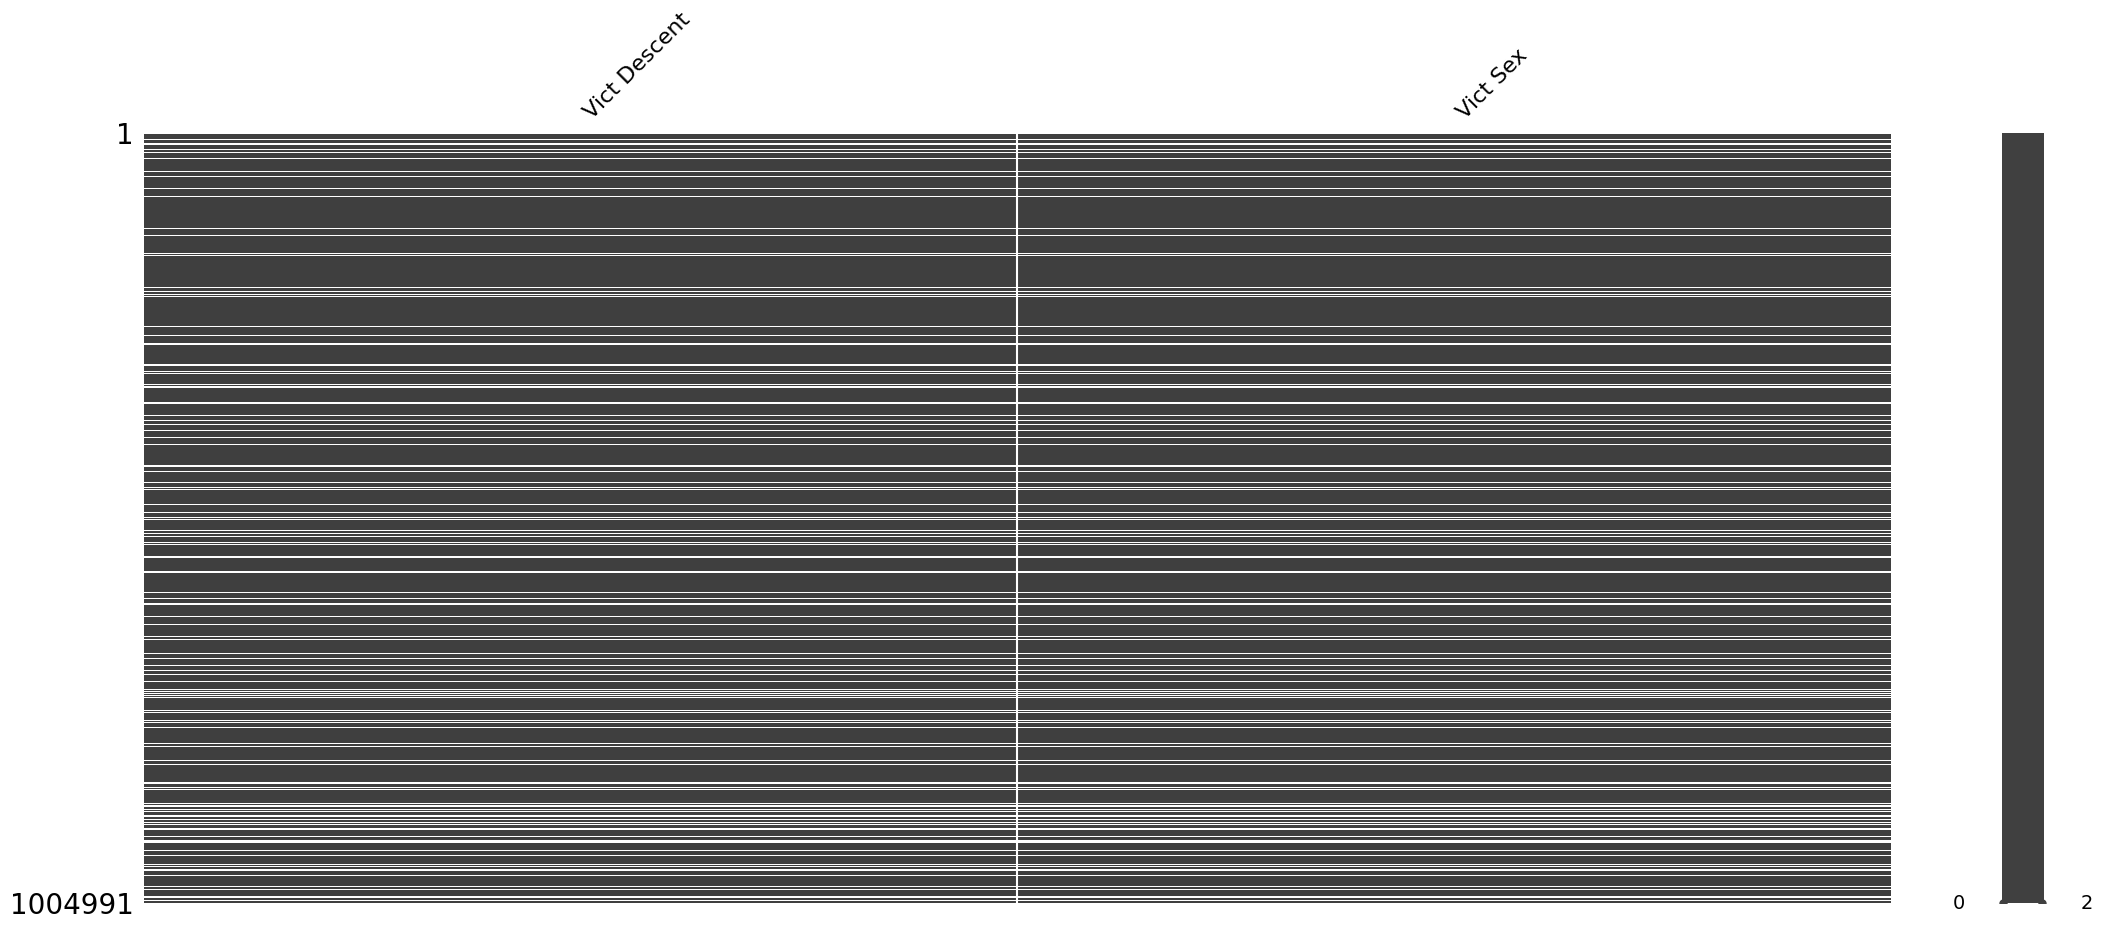

In [16]:
msno.matrix(data[['Vict Descent', 'Vict Sex']])

Avec msno, je vois que les deux variables tombent presque identiquement. On pourrait donc dire que certains rapports de polices manquent de relever ces deux variables ou leur disparition serait liée à une autre variable.

In [17]:
data[(data['Vict Sex'].isna()) & data['Vict Descent'].isna() & (data['Vict Age'] == "NO WEAPON")].iloc[:, 5:]

,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON


Je découvre à la fois que quand l'ethnie est inconnue, que le sexe est inconnu, l'âge est à 0, pour 144611.

In [18]:
data[(data['Vict Sex'].isna()) & data['Vict Descent'].isna() & (data['Weapon Used Cd'] == "NO WEAPON")].iloc[:, 5:]

,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
12,Topanga,2149,1,510,VEHICLE - STOLEN,NO RECORD,0,NaN,NaN,108.0,PARKING LOT,NO WEAPON,NO WEAPON,AA,Adult Arrest,510.0,19700 VANOWEN ST,PRECISE ADRESS,34.1938,-118.5631
31,Southeast,1851,1,510,VEHICLE - STOLEN,NO RECORD,0,NaN,NaN,101.0,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,510.0,MENLO AV,130TH ST,33.9144,-118.2894
39,Pacific,1453,1,510,VEHICLE - STOLEN,NO RECORD,0,NaN,NaN,108.0,PARKING LOT,NO WEAPON,NO WEAPON,IC,Invest Cont,510.0,4000 GLENCOE AV,PRECISE ADRESS,33.9918,-118.4446
53,Topanga,2189,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NO RECORD,0,NaN,NaN,101.0,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,420.0,20500 VENTURA BL,PRECISE ADRESS,34.1683,-118.5787
54,Mission,1901,1,510,VEHICLE - STOLEN,NO RECORD,0,NaN,NaN,101.0,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,510.0,FOOTHILL,BALBOA,34.3193,-118.4871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004944,77th Street,1259,1,510,VEHICLE - STOLEN,NO RECORD,0,NaN,NaN,101.0,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,510.0,7800 MCKINLEY AV,PRECISE ADRESS,33.9685,-118.2608
1004958,Southwest,358,1,510,VEHICLE - STOLEN,NO RECORD,0,NaN,NaN,101.0,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,510.0,1000 W 34TH ST,PRECISE ADRESS,34.0243,-118.2876
1004967,Southwest,358,1,510,VEHICLE - STOLEN,NO RECORD,0,NaN,NaN,101.0,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,510.0,600 CHILDS WY,PRECISE ADRESS,34.0189,-118.2819
1004980,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",NO RECORD,0,NaN,NaN,108.0,PARKING LOT,NO WEAPON,NO WEAPON,IC,Invest Cont,522.0,2600 ELLENDALE PL,PRECISE ADRESS,34.0307,-118.2923


Pour 144560, il n'y a pas d'arme renseignée, lorsque l'ethnie de la victime est inconnue et de même pour son sexe.

<style>
    .victimes {
        color: #fca311;
    }
</style>
Pour les nan des colonnes <span class="victimes">Vict Descent</span> et <span class="victimes">Vict Sex</span>, je déduis que les données manquantes sont de types MAR, leur disparition s'explique mutuellement. PROBABLEMENT ces informations manquent, car il n'y a pas de victime humaine identifiée.

Lorsque les deux valeurs sont manquantes, je remplace leur colonne respectif par NO VICTIM. Dans le cas spécifique, les remplace par X for UNKNOWN

In [19]:
#Pour mieux sélectionner le cas où les deux sont manquantes, je vais créer un mask

mask = data['Vict Descent'].isna() & data['Vict Sex'].isna()
data.loc[mask, 'Vict Descent'] = "NO VICTIM"
data.loc[mask, 'Vict Sex'] = "NO VICTIM"

In [20]:
data['Vict Descent'] = data['Vict Descent'].fillna("X")
data['Vict Sex'] = data['Vict Sex'].fillna("X")

In [21]:
data[data['Premis Desc'].isna()].iloc[:, 8:]

,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
861,210,ROBBERY,1822 2018 0344 0213 0216 0334 0342,0,X,X,418.0,NaN,104.0,SHOTGUN,IC,Invest Cont,210.0,9300 S BROADWAY,PRECISE ADRESS,33.9519,-118.2781
899,310,BURGLARY,1420 1309 0326 1414 2018 1607 1402,0,M,O,256.0,NaN,NO WEAPON,NO WEAPON,IC,Invest Cont,310.0,5500 CLEON AV,PRECISE ADRESS,34.1705,-118.3686
13186,310,BURGLARY,2018 0344 0321,0,M,W,256.0,NaN,NO WEAPON,NO WEAPON,IC,Invest Cont,310.0,8500 N LANKERSHIM BL,PRECISE ADRESS,34.2166,-118.3919
13967,444,DISHONEST EMPLOYEE - PETTY THEFT,0344,0,X,X,256.0,NaN,NO WEAPON,NO WEAPON,AO,Adult Other,444.0,8700 S SEPULVEDA BL,PRECISE ADRESS,33.9581,-118.3962
14394,310,BURGLARY,0321 1414 2018 0344 0325 1609,0,M,O,418.0,NaN,NO WEAPON,NO WEAPON,IC,Invest Cont,310.0,11500 VENTURA BL,PRECISE ADRESS,34.1451,-118.3875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990424,888,TRESPASSING,0910 2004,0,X,X,973.0,NaN,NO WEAPON,NO WEAPON,IC,Invest Cont,888.0,200 S HOPE ST,PRECISE ADRESS,34.0549,-118.2511
990707,310,BURGLARY,1402 1609 0329 1309 0342 1822 0216,0,X,X,418.0,NaN,NO WEAPON,NO WEAPON,IC,Invest Cont,310.0,6000 S WESTERN AV,PRECISE ADRESS,33.9859,-118.3090
996501,310,BURGLARY,1420 1402 0397,0,M,W,256.0,NaN,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,310.0,21300 DEERING CT,PRECISE ADRESS,34.2156,-118.5956
999798,310,BURGLARY,1822 0325 0329 2018,0,X,X,256.0,NaN,NO WEAPON,NO WEAPON,IC,Invest Cont,310.0,10800 CHANDLER BL,PRECISE ADRESS,34.1687,-118.3664


<style>
    .premise {
        color: #bc4749;
    }
</style>
La colonne <span class="premise">Premis Desc</span> est sans doute un MAR. L'explication peut ne pas être fournie pour ces cas spécifiques. 

Il en est de même pour <span class="premise">Premis Cd</span> Où on n'identifie pas clairement la structure où le crime a eu lieu. Et si on ne l'identifie pas, c'est normal qu'il n'y ait pas de description. Je vais remplacer premise Cd par 0, comme c'est une colonne de chiffre et le Premis Desc par NO DESCRIPTION.

In [22]:
data['Premis Cd'] = data['Premis Cd'].fillna(0)
data['Premis Desc'] = data['Premis Desc'].fillna("NO DESC")

In [23]:
data[data['Crm Cd 1'].notna()].loc[:, ['Crm Cd', 'Crm Cd 1']]

,Crm Cd,Crm Cd 1
0,354,354.0
1,230,230.0
2,354,354.0
3,331,331.0
4,420,420.0
...,...,...
1004986,946,946.0
1004987,237,237.0
1004988,850,850.0
1004989,624,624.0


<style>
    .crimes {
        color: #80ed99;
    }
</style>

Pour la colonne <span class="crimes">Crm Cd 1</span>, remplacer les NaN n'est pas difficile, car je vois que le code de <span class="crimes">Crm Cd</span> est le même que pour la colonne. Je choisis donc de remplacer les NaN par les code dans la première colonne.

In [24]:
data['Crm Cd'].fillna(0)
data['Crm Cd 1'] = data['Crm Cd 1'].fillna(data['Crm Cd'])

In [25]:
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,7800 BEEMAN AV,PRECISE ADRESS,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,14600 SYLVAN ST,PRECISE ADRESS,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,331.0,6000 COMEY AV,PRECISE ADRESS,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,ALLEY,NO WEAPON,NO WEAPON,IC,Invest Cont,420.0,4700 LA VILLA MARINA,PRECISE ADRESS,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,02/02/2025 12:00:00 AM,02/02/2025 12:00:00 AM,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,946.0,22100 ROSCOE BL,PRECISE ADRESS,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,237.0,3500 PERCY ST,PRECISE ADRESS,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,850.0,300 E 53RD ST,PRECISE ADRESS,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,9600 ZELZAH AV,PRECISE ADRESS,34.2450,-118.5233


<style>
    .status {
        color: #f4f1bb;
    }
</style>
Selon le dictionnaire des données, le champ <span class="status">Status</span> a une valeur par défaut qui est IC. L'idéal est donc de remplacer la donnée manquante par IC.

In [26]:
data['Status'] = data['Status'].fillna('IC')

In [27]:
data.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

_Toutes les données manquantes ont été traitées_

## Correction des types de données

In [28]:
data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd     object
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

Je vois que les colonnes de dates sont aussi constituées des dates et des heures. Je choisis de supprimer ces heures fixes, car elles ne me seront d'aucune utilité.

In [29]:
data['Date Rptd'] = (data['Date Rptd'].apply(lambda x: x.split()[0]))
data['DATE OCC'] = (data['DATE OCC'].apply(lambda x: x.split()[0]))

In [30]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021,11/07/2020,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,7800 BEEMAN AV,PRECISE ADRESS,34.2124,-118.4092
1,201516622,10/21/2020,10/18/2020,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024,10/30/2020,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,14600 SYLVAN ST,PRECISE ADRESS,34.1847,-118.4509
3,210704711,12/24/2020,12/24/2020,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,331.0,6000 COMEY AV,PRECISE ADRESS,34.0339,-118.3747
4,201418201,10/03/2020,09/29/2020,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,ALLEY,NO WEAPON,NO WEAPON,IC,Invest Cont,420.0,4700 LA VILLA MARINA,PRECISE ADRESS,33.9813,-118.4350


Je constate que le format des dates est sous forme de Mois/Jours/Année. Je vais les transformer dans un format Jours/Mois/Année. Cela me faciliterait l'exploration.

In [31]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'], dayfirst=False)
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], dayfirst=False)

Convertissons dans les types idoines les colonnes de dates

In [32]:
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,7800 BEEMAN AV,PRECISE ADRESS,34.2124,-118.4092
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,14600 SYLVAN ST,PRECISE ADRESS,34.1847,-118.4509
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,331.0,6000 COMEY AV,PRECISE ADRESS,34.0339,-118.3747
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,ALLEY,NO WEAPON,NO WEAPON,IC,Invest Cont,420.0,4700 LA VILLA MARINA,PRECISE ADRESS,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,946.0,22100 ROSCOE BL,PRECISE ADRESS,34.2259,-118.6126
1004987,250404100,2025-02-18,2025-02-18,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,237.0,3500 PERCY ST,PRECISE ADRESS,34.0277,-118.1979
1004988,251304095,2025-01-31,2025-01-30,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,850.0,300 E 53RD ST,PRECISE ADRESS,33.9942,-118.2701
1004989,251704066,2025-01-17,2025-01-17,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,9600 ZELZAH AV,PRECISE ADRESS,34.2450,-118.5233


In [33]:
data.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd            object
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

## Sauvegarde des données nettoyées

In [34]:
data.to_csv('Crime_Data_LA.csv')